In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("train.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# dataframe with categorical features
data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [3]:
s = pd.DataFrame( data['MSSubClass'], data['SalePrice'])

In [4]:
data['MSSubClass'].nunique()

15

In [5]:
target = data['SalePrice']



In [6]:
data["Condition2"].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [7]:
data['Alley'].nunique()
data['MSSubClass'].describe

<bound method NDFrame.describe of 0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64>

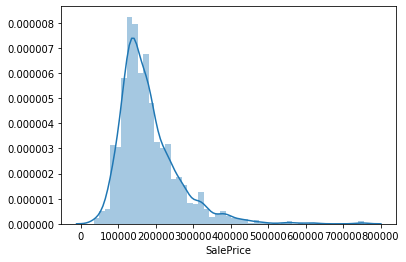

In [8]:
# Visualizing the distribution of Salesprice(Dependent) variable 
import seaborn as sns
sns.distplot(target,hist=True)

In [9]:
# Log transformation becasue its skewed 
import numpy as np
target_log  = np.log(target)

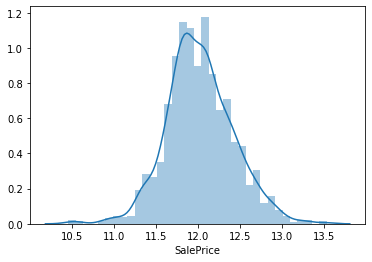

In [10]:
sns.distplot(target_log,hist=True)

In [11]:
# drop target variable from dataset
raw_data = data



In [12]:
# MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)

In [13]:
my_features = ['MSSubClass','MSZoning', 'Street', 'Alley']

In [14]:
data = data[my_features]

In [15]:
data['MSZoning'].unique()


array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [16]:
data.columns
# data.columns
# data_num = data.drop(categorical_columns, axis=1)
# save all categorical columns in list
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)


In [17]:
categorical_columns

['MSSubClass', 'MSZoning', 'Street', 'Alley']

In [18]:
categorical_columns

['MSSubClass', 'MSZoning', 'Street', 'Alley']

In [19]:
data.describe

<bound method NDFrame.describe of      MSSubClass MSZoning Street Alley
0            60       RL   Pave   NaN
1            20       RL   Pave   NaN
2            60       RL   Pave   NaN
3            70       RL   Pave   NaN
4            60       RL   Pave   NaN
...         ...      ...    ...   ...
1455         60       RL   Pave   NaN
1456         20       RL   Pave   NaN
1457         70       RL   Pave   NaN
1458         20       RL   Pave   NaN
1459         20       RL   Pave   NaN

[1460 rows x 4 columns]>

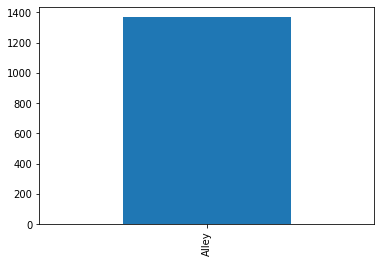

In [23]:
# FILLING UP MISSING VALUES 
# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()

In [24]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Alley,1369,0.937671
Street,0,0.000000
MSZoning,0,0.000000
MSSubClass,0,0.000000


In [107]:
# So no missing values for Street, MSZoning, and MSSubClass , However ALley has lots of missing data 

In [108]:
# We may leave the data as it is or do data imputation
# to replace them. Suppose the number of cases of missing values is extremely small; then we may drop or omit those values from the analysis. In statistical language, if the number of the cases is less than 5% of the sample, then we can drop them.

# If there is a larger number of missing values, then it is 
# better to drop those cases (rather than do imputation) and replace them.

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())
        
# Worth Meantioning that we (our batch) decided to leabve the ALLEy column becasue NaN is actually representing 'Doesn't have"
# rather than 'missing value' according to pandas documentation. 


In [25]:
missing_data

,Total,Percent
Alley,1369,0.937671
Street,0,0.000000
MSZoning,0,0.000000
MSSubClass,0,0.000000


In [110]:
# HANDLING MISSING VALUES WITH CATEGORICAL VALUES 

In [26]:
data_len = data_cat.shape[0]
# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1, inplace=True)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #\\print("filling missing values with XXX: {}".format(col))
        #data_cat = data_cat.fillna('XXX')
        pass

droping column: Alley


In [27]:
data_cat.describe()

,MSSubClass,MSZoning,Street
count,1460,1460,1460
unique,15,5,2
top,20,RL,Pave
freq,536,1151,1454


In [113]:
data.drop(["Alley"], axis=1, inplace=True)

In [114]:
# TURNING CATEGORICAL VARIABLES INTO DUMMY VARIEBLES SO COMPUTER CAN EASILY UNDERSTAND WHATS HAPENNING
data_cat.columns
data_cat

,MSSubClass,MSZoning,Street
0,60,RL,Pave
1,20,RL,Pave
2,60,RL,Pave
3,70,RL,Pave
4,60,RL,Pave
...,...,...,...
1455,60,RL,Pave
1456,20,RL,Pave
1457,70,RL,Pave
1458,20,RL,Pave


In [30]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [31]:
data['Street'].nunique()

2

In [32]:
data_cat_dummies

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1456,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1457,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1458,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [33]:
# Viewing dimensionality of the DataFrame.
data_cat_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [34]:
print("Numerical variables  : " + str(len(data_num.columns)))
print("Categorical variables : " + str(len(data_cat_dummies.columns)))

Numerical variables  : 0
Categorical variables : 19


In [119]:
# NOW after Statistical analysis, after converting all features into numbers with dummy variables we are ready to concat these series 
# into dataframe 
newdf = pd.concat([data_num, data_cat_dummies], axis=1)
newdf

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1456,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1457,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1458,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [1]:
# WE do not forget about the target variable (y - dependent variable)
target.head()

NameError: name 'target' is not defined

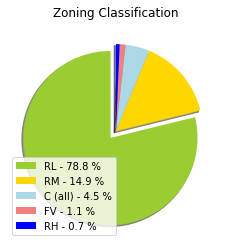

Text(0, 0.5, 'Sale Price')

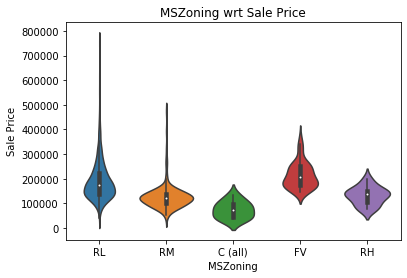

In [37]:
# creatingnew dataframe with y dependent and independent variables (4 features))
# MSZoning
labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

sns.violinplot(raw_data.MSZoning,raw_data["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price")

In [36]:
data['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: object

In [37]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [47]:
#------------------------------------------LINEAR REGRESSION MODELING ------------------------------------------------------
# PREPARING DATASET
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(data, target_log, test_size = 0.25)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1095, 4)
x_test  (365, 4)
y_train  (1095,)
y_test  (365,)


In [48]:
data

,MSSubClass,MSZoning,Street,Alley
0,60,RL,Pave,NaN
1,20,RL,Pave,NaN
2,60,RL,Pave,NaN
3,70,RL,Pave,NaN
4,60,RL,Pave,NaN
...,...,...,...,...
1455,60,RL,Pave,NaN
1456,20,RL,Pave,NaN
1457,70,RL,Pave,NaN
1458,20,RL,Pave,NaN
